In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn import preprocessing
import matplotlib.colors as colors
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import numpy as np
import pandas as pd

In [2]:
def create_lift(outcome, model_proba, precision = 2, vis = False):
    """
    Returns series with the lift of the model. You may plot the results.
    
    Prequisites:
    - Numpy
    - Pandas
    - Matplotlib (for visualisation)
    
    Parameters:
    - outcome: List or array containing the fact target variable
    - model_proba: List or array containing the probability estimates of our model
    - precision: Number of decimal places to round to
    - vis: Display the resulting lift chart on a basic plt plot
    
    """
    import pandas as pd
    import numpy as np
    
    df_pred = pd.DataFrame({'outcome':outcome, 'model_proba':model_proba})

    
    df_pred['model_proba_pct'] = df_pred['model_proba'].rank(pct=True).round(precision)
    avgoutcome = np.mean(df_pred['outcome'])
    df_grp = df_pred.groupby('model_proba_pct')['outcome'].agg(['sum','count'])
    df_grp = df_grp.sort_index(ascending = False)
    
    df_grp['lift'] = (df_grp['sum'].cumsum()/df_grp['count'].cumsum())/avgoutcome
    
    if vis == True:
        import matplotlib.pyplot as plt
        plt.figure(figsize = (10,7.5))
        plt.plot(df_grp['lift'], linewidth = 3)
        df_grp['ref'] = 1
        plt.plot(df_grp['ref'], '--', linewidth = 3)
        plt.gca().invert_xaxis()
        plt.ylabel('Lift')
        plt.xlabel('Percentile of probability')
        plt.title('Lift Chart')
        plt.show()
    
    return(df_grp['lift'])

<H1>Ladujemy zbior breast cancer</H1>

In [3]:
cancer = datasets.load_breast_cancer( as_frame=True )

<H2>Zmienne objasniajace</H2>

In [4]:
cancer['data'].columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [5]:
cancer['data'].head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [6]:
X = cancer['data']
y = cancer['target']

<H2>Podzial zbior uczacy i testowy</H2>

In [7]:
# Split data 75%-25% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 0)
#print (f'X_train: {X_train.shape} \nX_test: {X_test.shape} \ny_train: {y_train.shape} \ny_test: {y_test.shape}')

<H2>Uczymy model</H2>

In [8]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X_scaled = scaler.fit_transform(X_train)

# Create logistic regression model
model = LogisticRegression(solver='liblinear',max_iter=100)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = model.predict(X_test)





# train a logistic regression model on the training set
#model = LogisticRegression(random_state=0,max_iter=100)
#model = LogisticRegression().fit(X_train, y_train)
#model.fit(X_train, y_train, )
#print (model)

#model.intercept_

In [9]:
model.coef_

array([[ 1.72214229,  0.08981255,  0.10599007, -0.00713474, -0.12840897,
        -0.33349607, -0.49935781, -0.2650791 , -0.26760655, -0.02149476,
         0.03647241,  0.98653366,  0.11708895, -0.10871706, -0.00796627,
         0.01056279, -0.02918528, -0.02818263, -0.03431338,  0.00856816,
         1.35831332, -0.2890426 , -0.2498325 , -0.02012392, -0.21696437,
        -1.02745739, -1.44794739, -0.5337749 , -0.64855968, -0.10913337]])

In [10]:
model.intercept_

array([0.35463046])

<H2>Dokonujemy predykcji</H2>

In [11]:
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)
#print('Predicted labels: ', predictions)
#print('Actual labels:    ' ,y_test)



In [12]:
#probabilities

<H1>Przyklad</H1>

<H2>Zerknijmy na rozklad prawdopodobienstwa predykcji</H2>

(array([71.,  8.,  4.,  2.,  1.,  0.,  4.,  2.,  3., 48.]),
 array([8.43640696e-05, 1.00075928e-01, 2.00067491e-01, 3.00059055e-01,
        4.00050618e-01, 5.00042182e-01, 6.00033746e-01, 7.00025309e-01,
        8.00016873e-01, 9.00008436e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

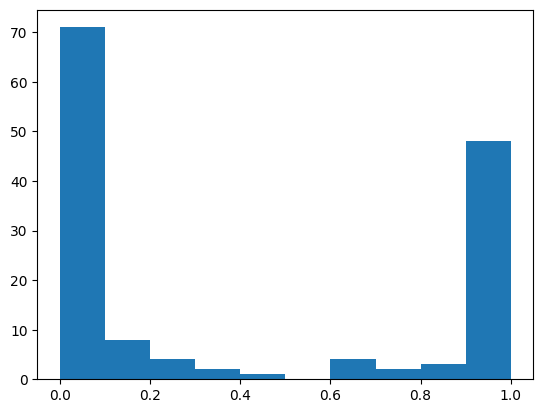

In [13]:
plt.hist( probabilities[:,0] )

<H2>Zerknijmy na rozklad prognozowaniej decyzji</H2>

(array([57.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 86.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

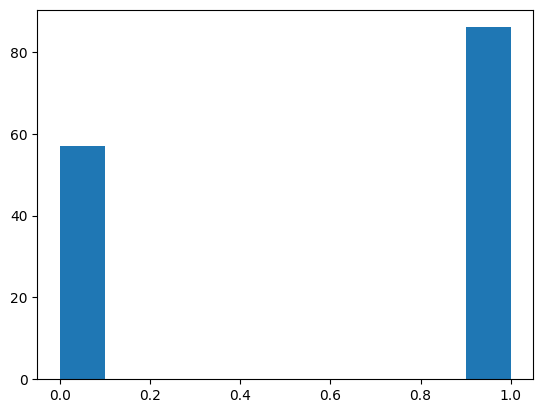

In [14]:
plt.hist( predictions )

<H2>Zerknijmy na rozklad zmiennej objasnianej</H2>

(array([53.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 90.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

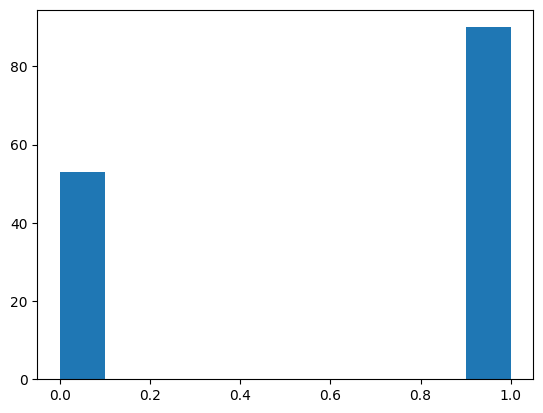

In [15]:
plt.hist( y_test )

In [16]:
print(f"Accuracy score default: {accuracy_score(y_test, predictions )}")

Accuracy score default: 0.958041958041958


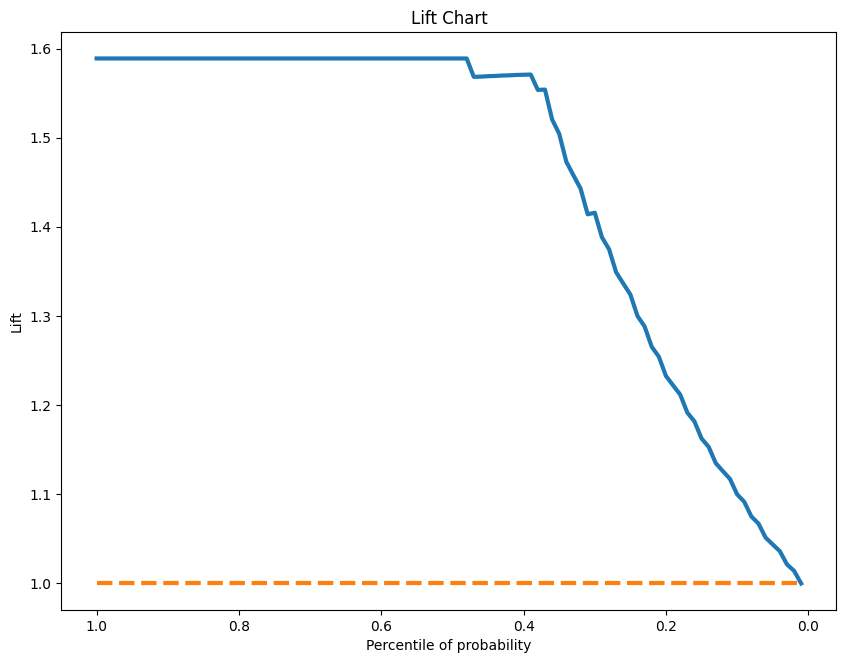

In [17]:
result = create_lift(y_test, probabilities[:,1],vis=True)

In [18]:
df_result = pd.DataFrame( result )
df_result['centyl'] = df_result.index

#display( df_result )
#
#plt.plot(df_result['centyl'], df_result['lift'])
#plt.title("Silhouette Hscore")
#plt.show()

<H2>Jak klasyfikator podejmuje decyzje</H2>

In [19]:
dataset = pd.DataFrame( {'Predicted labels':predictions, 'proba':probabilities[:,1], 'Actual labels':y_test} )
pd.options.display.float_format = "{:,.6f}".format

dataset['pred_65'] = dataset.apply(lambda row: 1 if row['proba'] > 0.65 else 0, axis=1)
dataset['pred_85'] = dataset.apply(lambda row: 1 if row['proba'] > 0.85 else 0, axis=1)
dataset['pred_95'] = dataset.apply(lambda row: 1 if row['proba'] > 0.95 else 0, axis=1)
dataset['pred_99'] = dataset.apply(lambda row: 1 if row['proba'] > 0.99 else 0, axis=1)

display( dataset.head(5) )
grouped = dataset.groupby(['Predicted labels', 'Actual labels']).agg({ 'Actual labels': 'count', })

grouped


,Predicted labels,proba,Actual labels,pred_65,pred_85,pred_95,pred_99
512,0,0.006752,0,0,0,0,0
457,1,0.969356,1,1,1,1,0
439,1,0.997567,1,1,1,1,1
298,1,0.794016,1,1,0,0,0
37,1,0.999916,1,1,1,1,1


Actual labels
Predicted labels Actual labels               
0                0                         52
                 1                          5
1                0                          1
                 1                         85

In [20]:
grouped = dataset.groupby(['pred_65', 'Actual labels']).agg({ 'Actual labels': 'count', })
print( 'pred_65' )
grouped

pred_65


Actual labels
pred_65 Actual labels               
0       0                         52
        1                          7
1       0                          1
        1                         83

In [21]:
grouped = dataset.groupby(['pred_85', 'Actual labels']).agg({ 'Actual labels': 'count', })
print( 'pred_85' )
grouped

pred_85


Actual labels
pred_85 Actual labels               
0       0                         53
        1                         14
1       1                         76

In [22]:
grouped = dataset.groupby(['pred_95', 'Actual labels']).agg({ 'Actual labels': 'count', })
print( 'pred_95' )
grouped

pred_95


Actual labels
pred_95 Actual labels               
0       0                         53
        1                         22
1       1                         68

In [23]:
grouped = dataset.groupby(['pred_99', 'Actual labels']).agg({ 'Actual labels': 'count', })

print( 'pred_99' )
grouped

pred_99


Actual labels
pred_99 Actual labels               
0       0                         53
        1                         41
1       1                         49

In [24]:
display( dataset.head(5) )
grouped = dataset.groupby(['Predicted labels', 'Actual labels', 'pred_65', 'pred_85', 'pred_95', 'pred_99']).agg({ 'Actual labels': 'count', })

grouped

,Predicted labels,proba,Actual labels,pred_65,pred_85,pred_95,pred_99
512,0,0.006752,0,0,0,0,0
457,1,0.969356,1,1,1,1,0
439,1,0.997567,1,1,1,1,1
298,1,0.794016,1,1,0,0,0
37,1,0.999916,1,1,1,1,1


Actual labels
Predicted labels Actual labels pred_65 pred_85 pred_95 pred_99               
0                0             0       0       0       0                   52
                 1             0       0       0       0                    5
1                0             1       0       0       0                    1
                 1             0       0       0       0                    2
                               1       0       0       0                    7
                                       1       0       0                    8
                                               1       0                   19
                                                       1                   49

In [25]:
print(f"Accuracy score default: {accuracy_score(y_test, dataset['Predicted labels'])}")
print(f"Accuracy score default 65: {accuracy_score(y_test, dataset['pred_65'])}")
print(f"Accuracy score default 85: {accuracy_score(y_test, dataset['pred_85'])}")
print(f"Accuracy score default 95: {accuracy_score(y_test, dataset['pred_95'])}")
print(f"Accuracy score default 99: {accuracy_score(y_test, dataset['pred_99'])}")

Accuracy score default: 0.958041958041958
Accuracy score default 65: 0.9440559440559441
Accuracy score default 85: 0.9020979020979021
Accuracy score default 95: 0.8461538461538461
Accuracy score default 99: 0.7132867132867133


In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        53
           1       0.99      0.94      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [27]:
print(classification_report(y_test, dataset['pred_65']))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93        53
           1       0.99      0.92      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143



In [28]:
print(classification_report(y_test, dataset['pred_85']))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        53
           1       1.00      0.84      0.92        90

    accuracy                           0.90       143
   macro avg       0.90      0.92      0.90       143
weighted avg       0.92      0.90      0.90       143



In [29]:
print(classification_report(y_test, dataset['pred_95']))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        53
           1       1.00      0.76      0.86        90

    accuracy                           0.85       143
   macro avg       0.85      0.88      0.84       143
weighted avg       0.89      0.85      0.85       143



In [30]:
print(classification_report(y_test, dataset['pred_99']))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72        53
           1       1.00      0.54      0.71        90

    accuracy                           0.71       143
   macro avg       0.78      0.77      0.71       143
weighted avg       0.84      0.71      0.71       143



(array([59.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 84.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

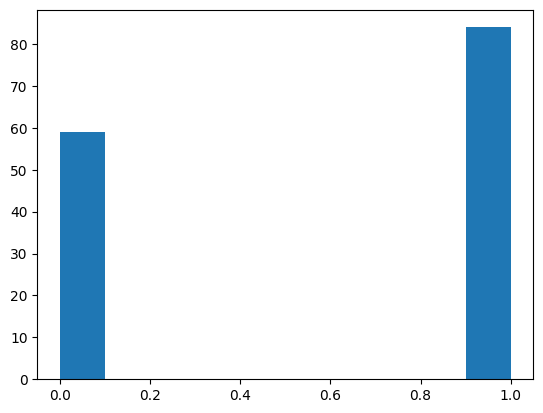

In [31]:
plt.hist( dataset['pred_65'] )

(array([67.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 76.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

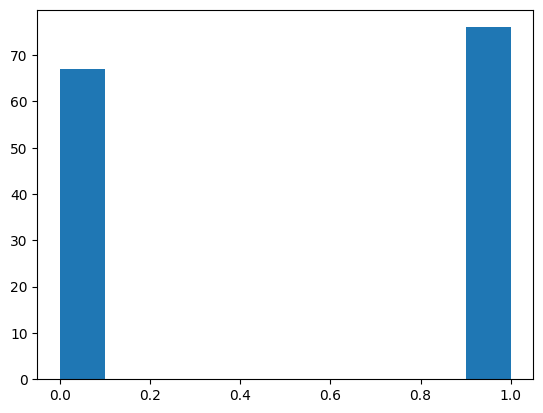

In [32]:
plt.hist( dataset['pred_85'] )

(array([75.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 68.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

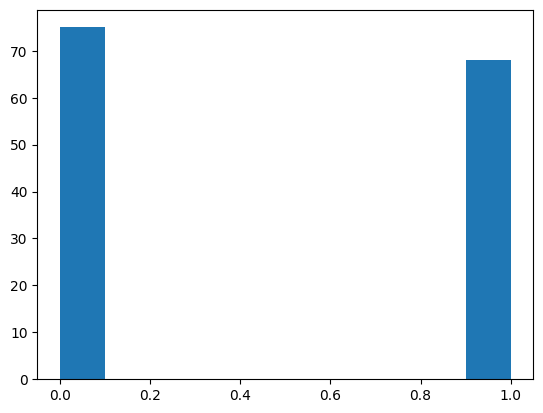

In [33]:
plt.hist( dataset['pred_95'] )

(array([94.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 49.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

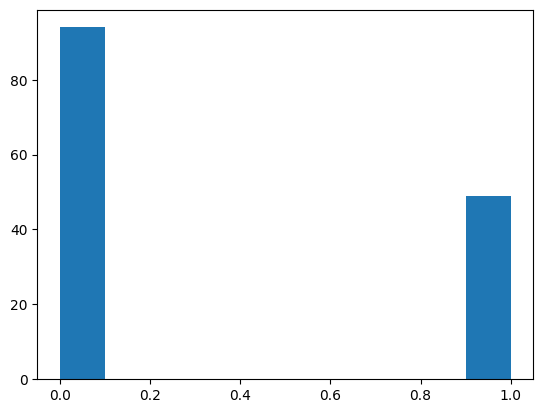

In [34]:
plt.hist( dataset['pred_99'] )

In [35]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=2, random_state=0).fit(X, y)

classifier.predict_proba(X[:4])

from sklearn import tree

text_representation = tree.export_text(classifier)
print(text_representation)





|--- feature_20 <= 16.80
|   |--- feature_27 <= 0.14
|   |   |--- class: 1
|   |--- feature_27 >  0.14
|   |   |--- class: 0
|--- feature_20 >  16.80
|   |--- feature_21 <= 19.91
|   |   |--- class: 1
|   |--- feature_21 >  19.91
|   |   |--- class: 0



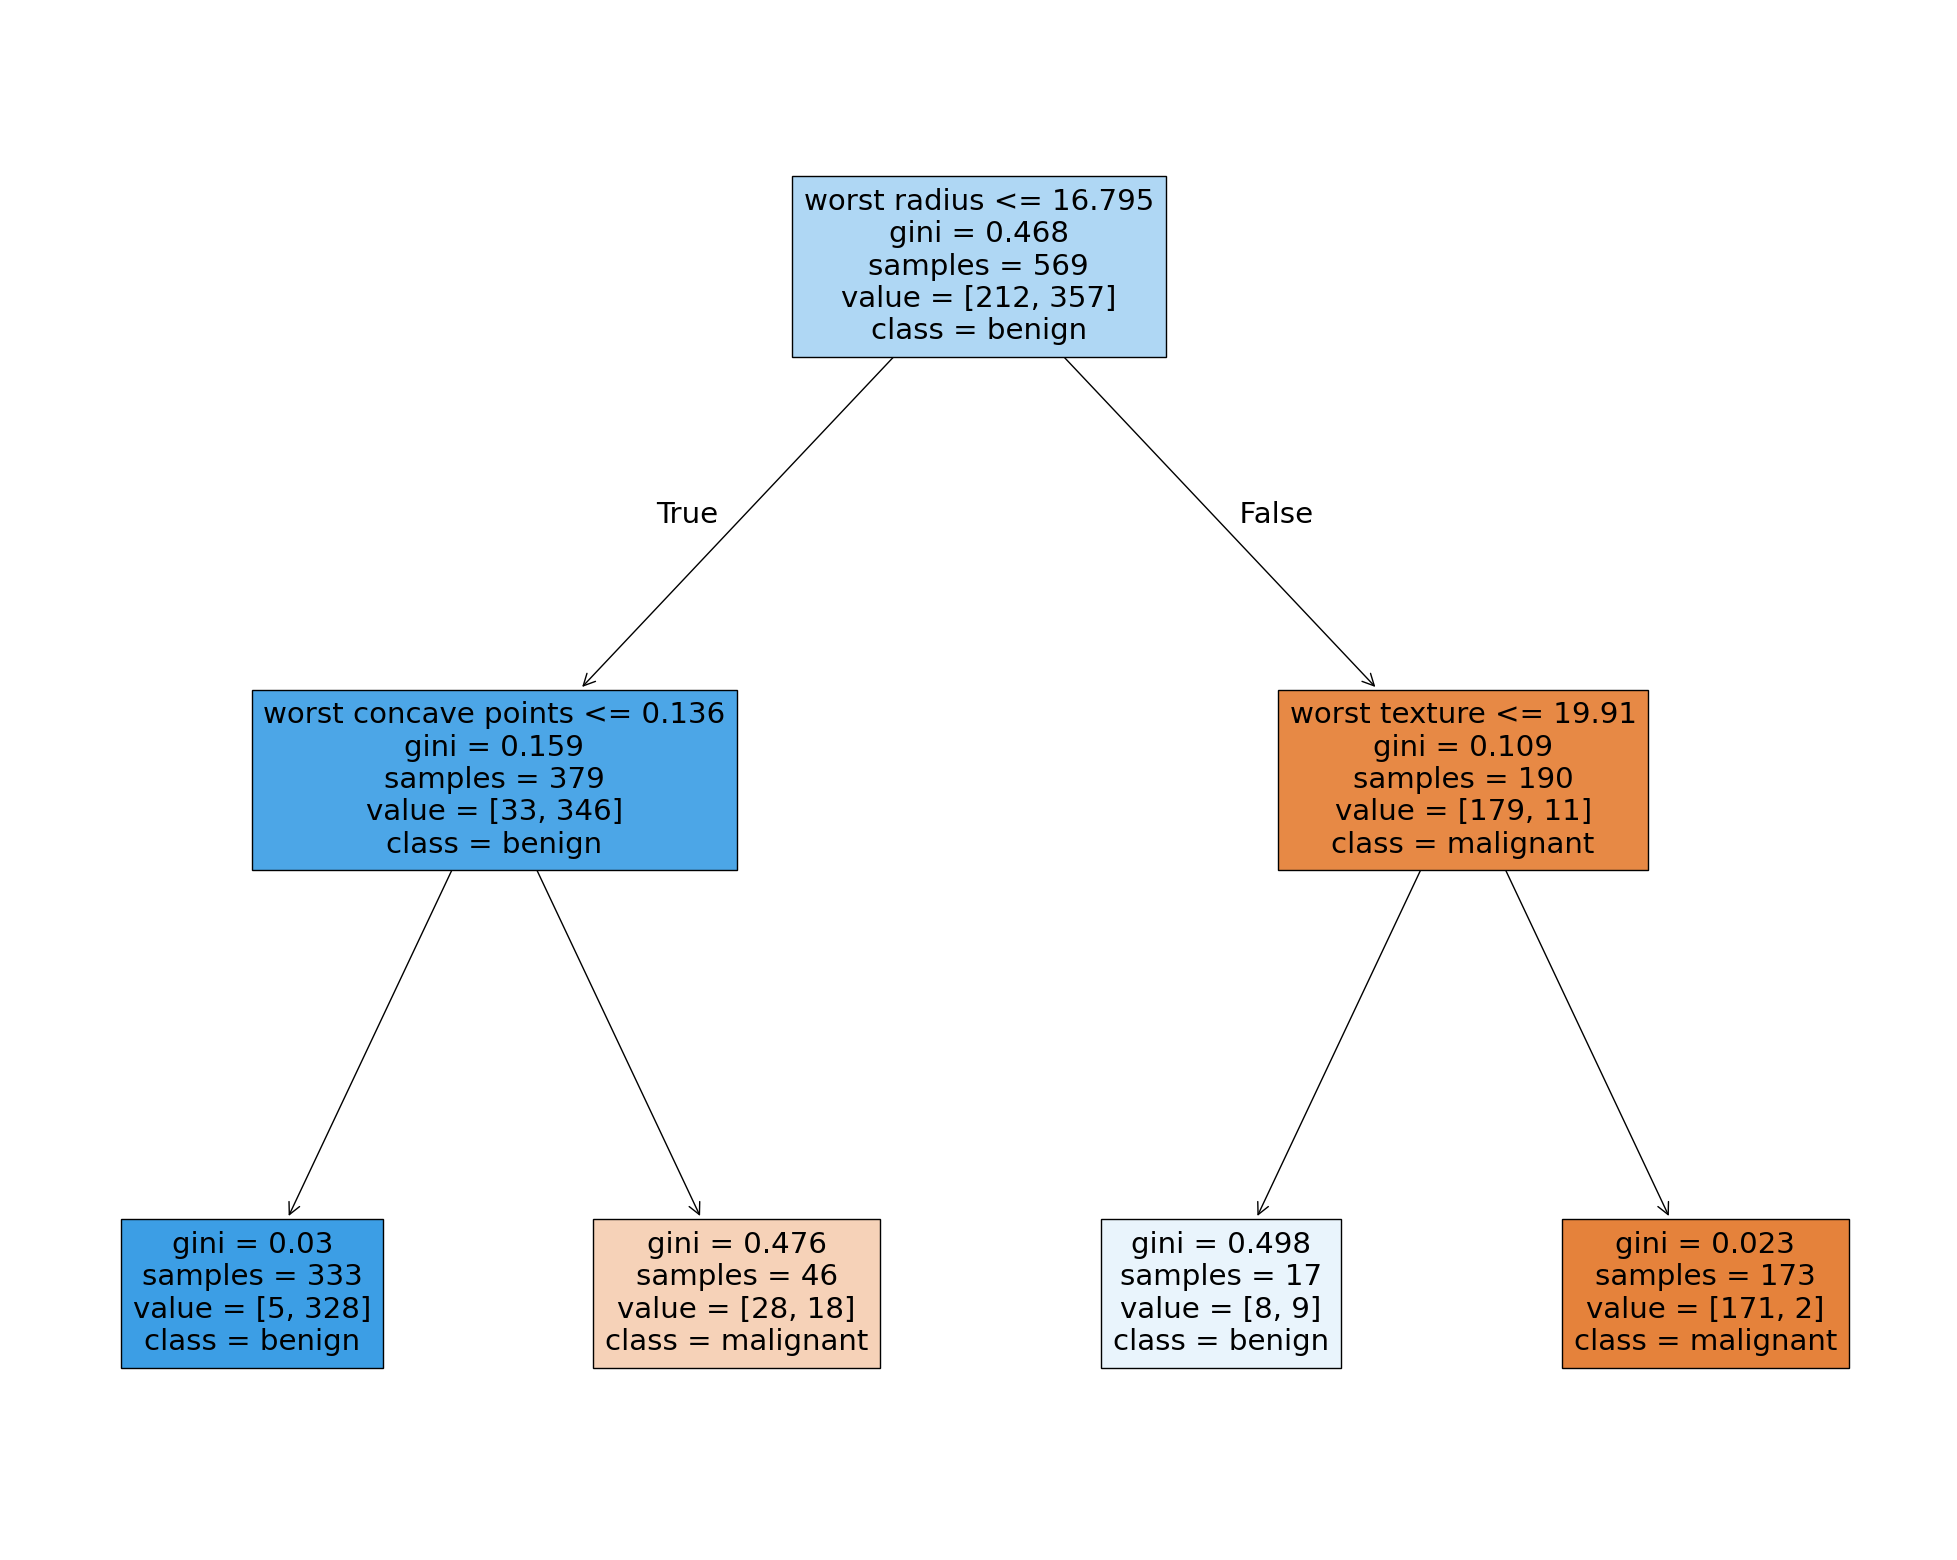

In [36]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier,
                   feature_names=cancer.feature_names,
                   class_names=cancer.target_names,
                   filled=True)

In [37]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=3, random_state=0).fit(X, y)

classifier.predict_proba(X[:4])

from sklearn import tree

text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_20 <= 16.80
|   |--- feature_27 <= 0.14
|   |   |--- feature_10 <= 1.05
|   |   |   |--- class: 1
|   |   |--- feature_10 >  1.05
|   |   |   |--- class: 0
|   |--- feature_27 >  0.14
|   |   |--- feature_21 <= 25.67
|   |   |   |--- class: 1
|   |   |--- feature_21 >  25.67
|   |   |   |--- class: 0
|--- feature_20 >  16.80
|   |--- feature_1 <= 16.11
|   |   |--- feature_15 <= 0.02
|   |   |   |--- class: 1
|   |   |--- feature_15 >  0.02
|   |   |   |--- class: 0
|   |--- feature_1 >  16.11
|   |   |--- feature_24 <= 0.09
|   |   |   |--- class: 1
|   |   |--- feature_24 >  0.09
|   |   |   |--- class: 0



In [38]:
classifier.predict(X[:4])

array([0, 0, 0, 0])

In [58]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), LogisticRegression())

pipe.fit(X_train, y_train)  # apply scaling on training data

pipe.score(X_test, y_test)

pipe.predict( X_test )

print(confusion_matrix(y_test, pipe.predict( X_test ) ) )

classifier_other_threshold = FixedThresholdClassifier(

    pipe, threshold=0.1, response_method="predict_proba"

).fit(X_train, y_train)

print(confusion_matrix(y_test, classifier_other_threshold.predict(X_test)))
print(classification_report(y_test, classifier_other_threshold.predict(X_test) ) )

[[50  3]
 [ 3 87]]
[[46  7]
 [ 0 90]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        53
           1       0.93      1.00      0.96        90

    accuracy                           0.95       143
   macro avg       0.96      0.93      0.95       143
weighted avg       0.95      0.95      0.95       143

